# Recurrent Neural Networks on **`Sin wave function`**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [3]:
x = np.linspace(0, 50, 501)
y = np.sin(x)

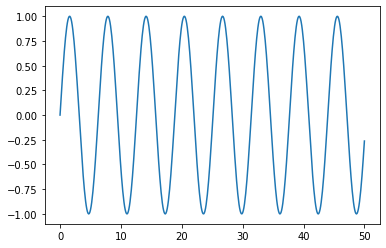

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Train Test Split

In [6]:
test_size = round(len(df) * 0.1)
split_index = len(df) - test_size
split_index

451

In [7]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [8]:
train_df.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [9]:
test_df.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [10]:
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (451, 1)
Test shape: (50, 1)


# Scale Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train = scaler.transform(train_df)
test = scaler.transform(test_df)

# Time Series Generator

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 49
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)
validation = TimeseriesGenerator(test, test, length=length, batch_size=batch_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

n_features = 1

model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=15, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/15


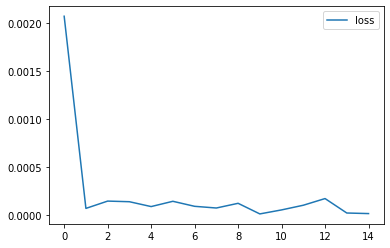

In [15]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
first_eval_batch = train[-length:]
# first_eval_batch

In [20]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

print(f"Model prediction: {model.predict(first_eval_batch)}")
print(f"True value: {test[0]}")

Model prediction: [[0.9462297]]
True value: [0.94955134]


In [21]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [23]:
# test_predictions

In [25]:
test_pred = scaler.inverse_transform(test_predictions)
# test_pred

In [27]:
test_df['pred'] = test_pred
test_df.head()

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sine,pred
45.1,0.899097,0.892454
45.2,0.938307,0.931125
45.3,0.968142,0.954864
45.4,0.988304,0.970110
45.5,0.998591,0.974704


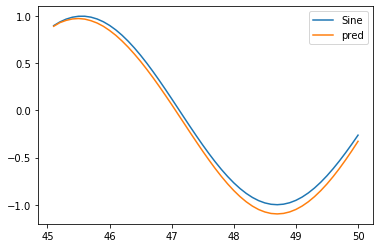

In [28]:
test_df.plot()

# Training LSTM model

In [30]:
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(length, n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [ ]:
model_1.fit(generator, epochs=20)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/20
401/401 [==============================] - 23s 58ms/step - loss: 0.0156
Epoch 2/20
401/401 [==============================] - 17s 43ms/step - loss: 2.2235e-04
Epoch 3/20
401/401 [==============================] - 17s 43ms/step - loss: 4.9517e-04
Epoch 4/20
 48/401 [==>...........................] - ETA: 14s - loss: 1.0602e-04

In [ ]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model_1.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [ ]:
test_pred = scaler.inverse_transform(test_predictions)
test_df['LSTM'] = test_pred

In [ ]:
test_df.plot(figsize=(12, 8));

In [ ]:
full_scaler = MinMaxScaler()